<a href="https://colab.research.google.com/github/umeshnmenon/EVA4/blob/master/EVA4_S5_Assmnt_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Target:
    ## 1. Increase capacity of model.
    ## 2. Add a layer after Gobal average pooling.Adding dense layer after GAP

# Result:
    ## 1. Parameters:9,660
    ## 2. Best train accuracy:98.84
    ## 3. Best test accuracy:99.39(13th epoch)

# Analysis:
   ## 1: The model is not over fitting.
   ## 2. At (18th epoch) train accuracy:98.92 and test accuracy:99.46 .
   ## 3. But we are not getting 99.40+ below 15th epoch.
   ## 4. Increase the capacity of model.

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(1,16,3,padding=0,bias=False),        #conv1  1 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                                     #RF:3
                                 nn.BatchNorm2d(16),                            #o/p:26
                                 nn.Dropout2d(0.04))
        
        self.conv2=nn.Sequential(nn.Conv2d(16,32,3,padding=0,bias=False),       #conv2  16 input , 32 0utput and 3x3 kernel
                                 nn.ReLU(),                                     #RF:5
                                 nn.BatchNorm2d(32),                            #o/p:24
                                 nn.Dropout2d(0.04))
        



        # used 1x1 kernel 
        self.conv3=nn.Sequential(nn.Conv2d(32,8,1,bias=False))                  #conv3  32 input , 8 0utput and 1x1 kernel 
                                                                                #RF:5
                                                                                #o/p:12
        

        self.maxpool=nn.MaxPool2d(2,2)                                          # maxpooling 2x2 kernel and stride 2
                                                                                #RF:6
                                                                                #o/p:12


     

        self.conv4=nn.Sequential(nn.Conv2d(8,14,3,padding=0,bias=False),        #conv4  8 input , 14 0utput and 3x3 kernel
                                 nn.ReLU(),                                     #RF:10
                                 nn.BatchNorm2d(14),                     
                                 nn.Dropout2d(0.04))
                                                                                #o/p:10
        
        self.conv5=nn.Sequential(nn.Conv2d(14,16,3,padding=0,bias=False),       #conv5  14 input , 16 0utput and 3x3 kernel
                                 nn.ReLU(),                                     #RF:14
                                 nn.BatchNorm2d(16),                     
                                 nn.Dropout2d(0.04))                                                
                                                                                #o/p:8
                                                                
        
        #self.maxpool=nn.MaxPool2d(2,2)
                                                               
        self.conv6=nn.Sequential(nn.Conv2d(16,8,1,padding=0,bias=False))       #conv6  16 input , 10 0utput and 3x3 kernel
                                                                                #RF:14
        
                                                                                #o/p:8

        self.conv7=nn.Sequential(nn.Conv2d(8,16,3,padding=0,bias=False),
                                 nn.ReLU(),                                     #conv6  10 input , 16 0utput and 3x3 kernel
                                 nn.BatchNorm2d(16),                            #RF:18
                                 nn.Dropout2d(0.04))                                       
                                                                                #o/p:6


        
        self.GAP=nn.AvgPool2d(6)                                                # Gobal Average Pooling 
                                                                                #RF:28

                                                                                #o/p:1

                                                                                

        self.conv8 = nn.Sequential(nn.Conv2d(16,10,1, padding=0, bias=False))                                              
                                                                                #RF:28
                                                                                #O/P:1
             
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
        #x=self.maxpool(x)
        x=self.conv3(x)
        x=self.maxpool(x)
        x=self.conv4(x)
        x=self.conv5(x)
        #x=self.maxpool(x)
        x=self.conv6(x)
        x=self.conv7(x)
        x=self.GAP(x)
        x=self.conv8(x)
        x=x.view(-1,10)
        return F.log_softmax(x)


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
         Dropout2d-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
         Dropout2d-8           [-1, 32, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             256
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,008
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
        Dropout2d-14           [-1, 14,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:

torch.manual_seed(12)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                       # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

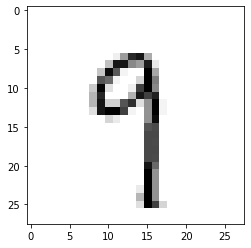

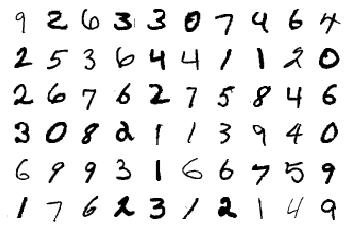

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[1].numpy().squeeze(), cmap='gray_r')

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [0]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    print("epoches:",epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

epoches: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.0814567357301712 Batch_id=468 Accuracy=83.98: 100%|██████████| 469/469 [00:12<00:00, 38.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1085, Accuracy: 9717/10000 (97.17%)

epoches: 2


Loss=0.102582186460495 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:11<00:00, 39.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 9842/10000 (98.42%)

epoches: 3


Loss=0.04877348616719246 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:12<00:00, 38.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0416, Accuracy: 9885/10000 (98.85%)

epoches: 4


Loss=0.07149841636419296 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:12<00:00, 38.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9892/10000 (98.92%)

epoches: 5


Loss=0.10572544485330582 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:11<00:00, 40.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9897/10000 (98.97%)

epoches: 6


Loss=0.03368724137544632 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:11<00:00, 40.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0307, Accuracy: 9901/10000 (99.01%)

epoches: 7


Loss=0.0795646458864212 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:12<00:00, 37.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9922/10000 (99.22%)

epoches: 8


Loss=0.021440953016281128 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:11<00:00, 40.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9931/10000 (99.31%)

epoches: 9


Loss=0.09554343670606613 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 42.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9920/10000 (99.20%)

epoches: 10


Loss=0.013190408237278461 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:12<00:00, 38.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

epoches: 11


Loss=0.025547824800014496 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:12<00:00, 37.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 9917/10000 (99.17%)

epoches: 12


Loss=0.058377042412757874 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:12<00:00, 38.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 9921/10000 (99.21%)

epoches: 13


Loss=0.03147916868329048 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:11<00:00, 43.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9939/10000 (99.39%)

epoches: 14


Loss=0.06594699621200562 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:12<00:00, 37.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9928/10000 (99.28%)

epoches: 15


Loss=0.034312035888433456 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:12<00:00, 38.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9919/10000 (99.19%)

epoches: 16


Loss=0.017121950164437294 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:12<00:00, 37.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9925/10000 (99.25%)

epoches: 17


Loss=0.023511916399002075 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:11<00:00, 39.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9935/10000 (99.35%)

epoches: 18


Loss=0.00871950387954712 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9946/10000 (99.46%)

epoches: 19


Loss=0.0819041058421135 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:12<00:00, 37.60it/s]



Test set: Average loss: 0.0202, Accuracy: 9934/10000 (99.34%)

